# ImagePreProcessing with GrayScale exp
### 이미지 데이터를 판단함에 있어서 색깔정보는 필요하지 않을 수 있다는 가정에서 시작

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray

In [24]:
def plot_sample(x, axis, title):
    # img = x.reshape(96,96)
    axis.imshow(x, cmap='gray')
    axis.axis('off')
    axis.set_title(title)

def draw_multi_plot(X, row_num=4, col_num=4, fig_size=(15,10)):
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)
    i=0
    for row in axes:
        for each_ax in row:
            plot_sample(X[i], each_ax, i)
            i += 1
    plt.tight_layout()

In [3]:
import os

## rgb 를 gray scale 하는 방법은 아래와 같다 

2
(214, 207)


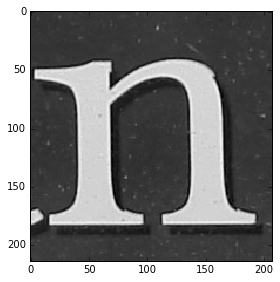

In [14]:
image = imread('train/1.Bmp')
gray_image = rgb2gray(image)
print(gray_image.ndim)
print(gray_image.shape)
imshow(gray_image)

### 만약 애초에 rgb 가 아닌 ndim=2 짜리는 위의 코드가 통할까?

2


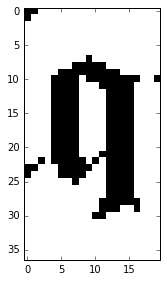

In [18]:
image = imread('train/2290.Bmp')
print(image.ndim)
gray_image = rgb2gray(image)
imshow(gray_image)

### 다행이 무리없이 통한다. 그럼 위를 바탕으로 gray scale 로 변환 작업을 시작한다.

In [26]:
if not os.path.exists("myTrainResized_GrayScale"):
    os.makedirs('myTrainResized_GrayScale')
    print(">> make myTrainResized_GrayScale dir")
file_num = 0
trainFiles = glob.glob("train/*")
for i, nameFile in enumerate(trainFiles):
    # print(nameFile)
    image = imread(nameFile)
    imageResized = resize(image, (20,20))
    gray_image = rgb2gray(imageResized)
    newName = "myTrainResized_GrayScale/" + nameFile.split("/")[-1]
#     print('nameFile.split("/")[:-1] : ', nameFile.split("/")[:-1])
#     print('nameFile.split("/")[-1] : ', nameFile.split("/")[-1])
    # print("newName : ", newName)
    imsave (newName, gray_image)
    i+=1
print(i, " image files preprocssing complete...")

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

6283  image files preprocssing complete...


/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

### 제대로 만들어졌는지 확인해보자

In [21]:
trainLabels = pd.read_csv('trainLabels.csv')
trainLabels.head(5)

,ID,Class
0,1,n
1,2,8
2,3,T
3,4,I
4,5,R


In [22]:
trainX = []
trainY_array = []
trainFiles = glob.glob("myTrainResized_GrayScale/*")
for i, nameFile in enumerate(trainFiles):
    # print(nameFile)
    id_col = int(nameFile.split('/')[-1].split('.')[0])
    trainY_array.append(trainLabels[trainLabels['ID'] == id_col]['Class'].item())
    image = imread(nameFile)
    trainX.append(image)
trainX = np.array(trainX)
print("trainX.shape", trainX.shape)
trainY = np.array(trainY_array)
trainY = pd.get_dummies(trainY).values
print("trainY.shape", trainY.shape)

trainX.shape (6283, 20, 20)
trainY.shape (6283, 62)


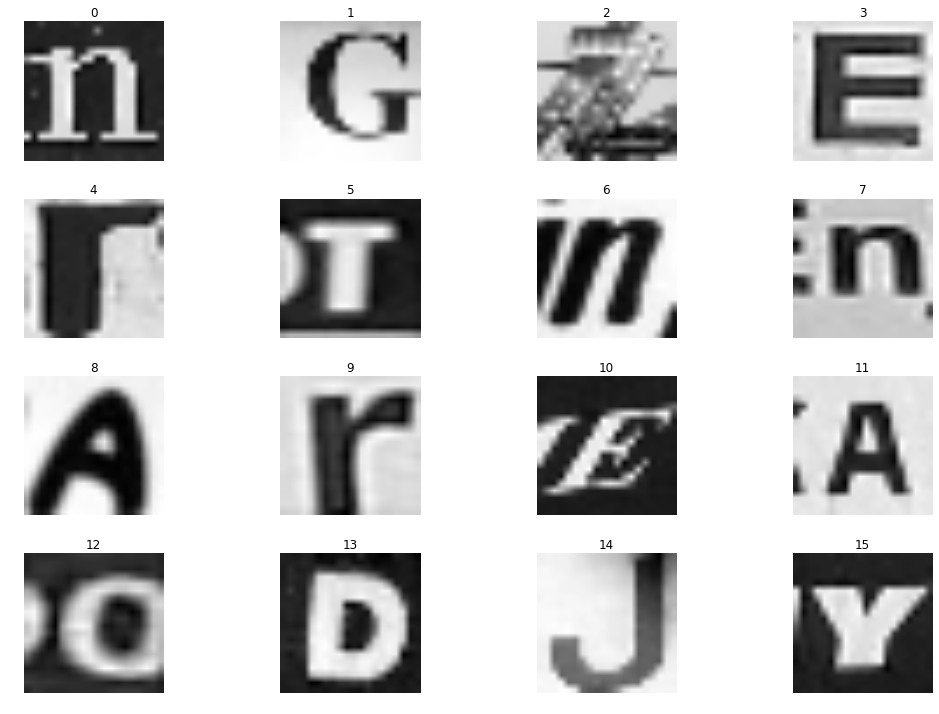

In [25]:
draw_multi_plot(trainX)

### 변환이 잘 완료 되었다.
### 여기서 gray scale 보다 edge 를 따는게 더 좋은 효과를 낼 꺼라는 생각이 갑자기 든다.